In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Space_server.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [4]:
df.shape

(10000, 18)

There are 10000 rows and 18 columns

In [33]:
df["class"].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

There are 3 unique classes to which the data neets to be classified into - star, galaxy and quasar

In [34]:
# Checking for null values

df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

There are no null values

In [5]:
# Converting categorical to numerical data - i.e type and region

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

df[['class']] = df[['class']].apply(label_encoder.fit_transform)
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,2,0.000590,3306,54922,512


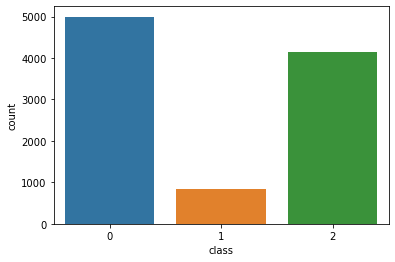

In [36]:
# Univariate analysis

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df["class"])
plt.show()

Most of the objects in our datasets are class 0 - galaxies and class 2 - stars while a few of them are class1 - quasars.

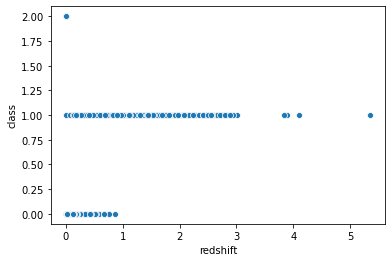

In [37]:
# Bivaraite analysis

sns.scatterplot(df["redshift"],df["class"])
plt.show()

The redshift of class0- galaxies ranges from 0 to 1 , class1-quasars from 0 to 5 and stars 0
Higher the redshift, higher will be the probability of the object being a quasar.

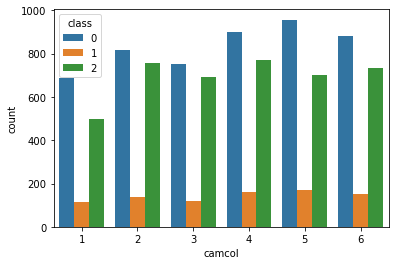

In [38]:
sns.countplot(df["camcol"],hue =df["class"])
plt.show()

Camcol 5 correspons to highest number of class2 - quasars detected, although most of the space objects detected are stars and galaxies.

In [39]:
# Correlation

df.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,-3.355500e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,-4.321896e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,-5.891815e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,-2.690437e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,-9.921163e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.962769e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,1.467908e-01,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,2.157584e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,-7.816172e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


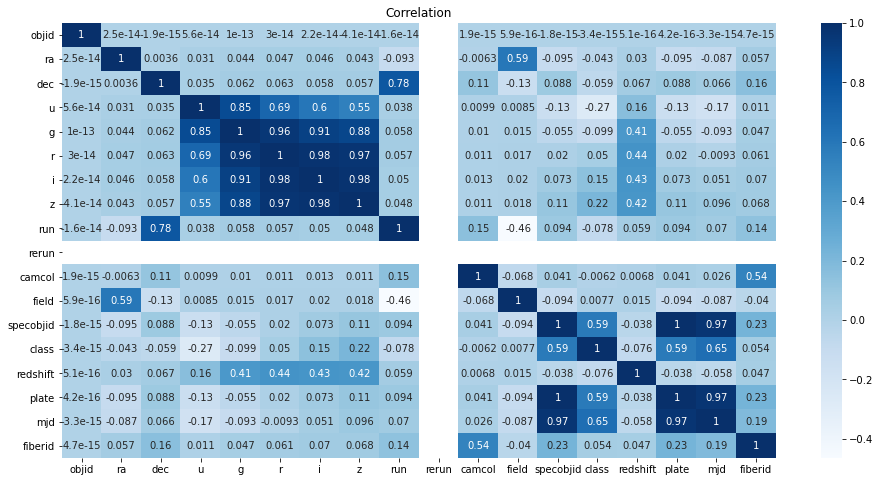

In [40]:
plt.figure(figsize=(16,8))
plt.title("Correlation")
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

The Thuan-Gunn astronomic magnitude system u, g, r, i, z are very highly correlated.

The traget variable - class a positive correlation with spaceobjid, plate and mjd.

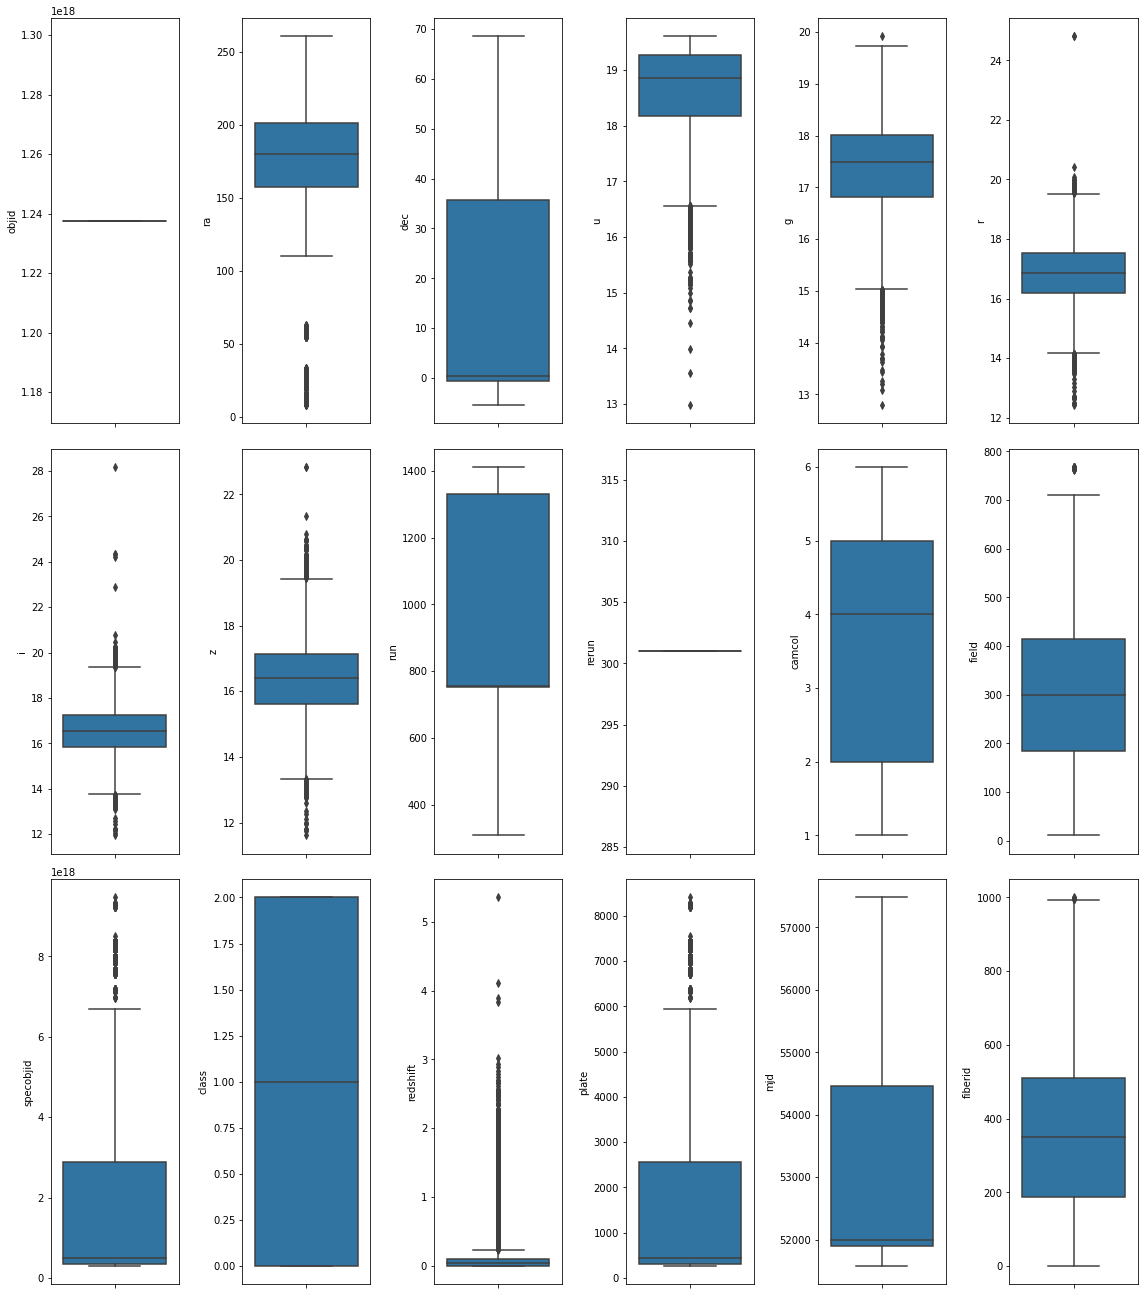

In [41]:
# Checking for outliers

collist = df.columns.values
ncol = 6
nrows = 5

plt.figure(figsize=(16,5*ncol))
for i in range(len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],orient = "v")
    plt.tight_layout()

The dataset has significant number of outliers in columns redshift, ra, u, g, z, i and r. the removal of these outliers may cause loss of relavent information, hence we continue with the dataset without removing outliers for now.

In [42]:
# Skewness

df.skew()

objid        1.000150
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [43]:
# The skewness in columns redshift and dec is caused by outliers and treating that will result in NaN values

for i in df[["objid",'specobjid','plate','mjd']]:
    df[i]=np.log(df[i]+1)
    
df.skew()

objid        0.000000
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    0.696181
class        0.169292
redshift     4.265729
plate        0.696680
mjd          1.011097
fiberid      0.308053
dtype: float64

In [44]:
# Splitting independent variables and target

x = df.drop('class',axis=1)
print(x.head())
y = df[['class']]
print("\n")
print(y.head())

       objid          ra       dec         u         g         r         i  \
0  41.659746  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  41.659746  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922   
2  41.659746  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  41.659746  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  41.659746  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field  specobjid  redshift     plate  \
0  15.22531  752    301       4    267  42.760890 -0.000009  8.103797   
1  16.39150  752    301       4    267  40.435419 -0.000055  5.780744   
2  16.80125  752    301       4    268  40.317277  0.123111  5.662960   
3  15.90438  752    301       4    269  42.760892 -0.000111  8.103797   
4  16.61326  752    301       4    269  42.760892  0.000590  8.103797   

         mjd  fiberid  
0  10.913687      491  
1  10.851587      541  
2  10.859460      51

In [45]:
# Using Standard scaler for uniform range in all columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.167458,-0.584923,1.031486,-0.348559,-0.837280,-0.946058,-0.995342,-0.838061,0.0,0.210852,-0.217630,1.336871,-0.369731,1.336869,1.317954,0.668632
1,0.0,0.168862,-0.583114,0.052430,-0.166533,-0.154155,-0.082645,-0.026043,-0.838061,0.0,0.210852,-0.217630,-0.779029,-0.369849,-0.779112,-0.888897,0.911012
2,0.0,0.170574,-0.583475,0.921568,0.867093,0.593154,0.441201,0.314528,-0.838061,0.0,0.210852,-0.211479,-0.886524,-0.053027,-0.886397,-0.609100,0.775279
3,0.0,0.174558,-0.586501,-1.030630,-0.813627,-0.636692,-0.526604,-0.430921,-0.838061,0.0,0.210852,-0.205328,1.336873,-0.369993,1.336869,1.317954,0.760736
4,0.0,0.174825,-0.584412,-1.290232,-1.172519,-0.376762,-0.025101,0.158276,-0.838061,0.0,0.210852,-0.205328,1.336873,-0.368189,1.336869,1.317954,0.770431


In [46]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [47]:
# Splitting into training and testing data

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [50]:
model = [GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]

for m in model:
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("accuracy score of", m,"is")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")

0.918875
accuracy score of GaussianNB() is
0.9035
[[965  25   6]
 [ 10 180   0]
 [130  22 662]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       996
           1       0.79      0.95      0.86       190
           2       0.99      0.81      0.89       814

    accuracy                           0.90      2000
   macro avg       0.89      0.91      0.89      2000
weighted avg       0.91      0.90      0.90      2000



0.962625
accuracy score of SVC() is
0.951
[[950   2  44]
 [  9 177   4]
 [ 39   0 775]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       996
           1       0.99      0.93      0.96       190
           2       0.94      0.95      0.95       814

    accuracy                           0.95      2000
   macro avg       0.96      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



1.0
accuracy score of DecisionTreeClassifier() is


Decision tree classifier is the best working model w.r.t the accuracy score. 

In [51]:
# cross_val_score

from sklearn.model_selection import cross_val_score

for m in model:
    print("Cross_val_score for",m ,'is ',cross_val_score(m,x,y,cv=5).mean())

Cross_val_score for GaussianNB() is  0.9162000000000001
Cross_val_score for SVC() is  0.9498
Cross_val_score for DecisionTreeClassifier() is  0.9831
Cross_val_score for KNeighborsClassifier() is  0.8933


In [52]:
# Gridsearch CV on Decision tree classifier

from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()
p = {'criterion':['gini','entropy'],'splitter':['best','random'],'random_state':range(0,100)}
a = GridSearchCV(dtc,p)
a.fit(x,y)
a.best_params_

{'criterion': 'entropy', 'random_state': 58, 'splitter': 'best'}

In [55]:
# dtc after hyperparameter tuning

dtc = DecisionTreeClassifier(criterion='entropy',random_state=58) # best is the default splitter
dtc.fit(x_train,y_train)
print(dtc.score(x_train,y_train))
pred=dtc.predict(x_test)
print("accuracy score of", dtc,"is")
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("Cross_val_score for",dtc ,'is ',cross_val_score(dtc,x,y,cv=5,scoring='accuracy').mean())

1.0
accuracy score of DecisionTreeClassifier(criterion='entropy', random_state=58) is
0.987
[[986   9   1]
 [ 14 176   0]
 [  0   2 812]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       996
           1       0.94      0.93      0.93       190
           2       1.00      1.00      1.00       814

    accuracy                           0.99      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.99      0.99      0.99      2000

Cross_val_score for DecisionTreeClassifier(criterion='entropy', random_state=58) is  0.9872000000000002


From the cross_val_score we can say that there is no overfitting.

In [54]:
# Saving the model - dtc

import joblib
joblib.dump(dtc,'dtc_Space_server_class.pkl')

['dtc_Space_server_class.pkl']